## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [15]:
def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,activation="relu",name="hidden_layer"+str(i+1))(input_layer)
            x = keras.layers.BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units,activation="relu",name="hidden_layer"+str(i+1))(x)
            x = keras.layers.BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [16]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [17]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.2,0.8]
redice_lr_patient = [2,8]

In [20]:
import itertools
results = {}
for i, optim in enumerate(optimizer_set):
    for factor in reduce_lr_factor:
        for patient in redice_lr_patient:
            keras.backend.clear_session()
            exp_name_tag = "optimizer:%s,reduce_factor:%.2f,reduce_patient:%.2f" % (['SGD','Adam','RMSprop'][i], factor, patient)
            print(exp_name_tag)
            model = build_mlp(input_shape=x_train.shape[1:])
            model.summary()
            model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)

            """Code Here
            設定 reduce learning rate 的 callback function
            """
            reduce_lr = keras.callbacks.ReduceLROnPlateau(factor=factor,min_lr=1e-12,monitor='val_loss',patience=patient,verbose=1)

            model.fit(x_train, y_train,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_data=(x_test, y_test),
                      shuffle=True,callbacks=[reduce_lr])

            # Collect results
            results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                                     'valid-loss': model.history.history["val_loss"],
                                     'train-acc': model.history.history["accuracy"],
                                     'valid-acc': model.history.history["val_accuracy"]}

optimizer:SGD,reduce_factor:0.20,reduce_patient:2.00
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
b

Epoch 11/25
49/49 [==============================] - 2s 51ms/step - loss: 1.9583 - accuracy: 0.3294 - val_loss: 1.9647 - val_accuracy: 0.3220
Epoch 12/25
49/49 [==============================] - 3s 52ms/step - loss: 1.9351 - accuracy: 0.3360 - val_loss: 1.9541 - val_accuracy: 0.3263
Epoch 13/25
49/49 [==============================] - 3s 52ms/step - loss: 1.9141 - accuracy: 0.3439 - val_loss: 1.9448 - val_accuracy: 0.3329
Epoch 14/25
49/49 [==============================] - 2s 50ms/step - loss: 1.8937 - accuracy: 0.3489 - val_loss: 1.9352 - val_accuracy: 0.3379
Epoch 15/25
49/49 [==============================] - 2s 51ms/step - loss: 1.8766 - accuracy: 0.3527 - val_loss: 1.9247 - val_accuracy: 0.3411
Epoch 16/25
49/49 [==============================] - 3s 54ms/step - loss: 1.8609 - accuracy: 0.3581 - val_loss: 1.9156 - val_accuracy: 0.3462
Epoch 17/25
49/49 [==============================] - 3s 53ms/step - loss: 1.8442 - accuracy: 0.3633 - val_loss: 1.9045 - val_accuracy: 0.3497
Epoch 

Epoch 1/25
49/49 [==============================] - 3s 57ms/step - loss: 2.9602 - accuracy: 0.1119 - val_loss: 2.3024 - val_accuracy: 0.1252
Epoch 2/25
49/49 [==============================] - 3s 53ms/step - loss: 2.5808 - accuracy: 0.1742 - val_loss: 2.2530 - val_accuracy: 0.1653
Epoch 3/25
49/49 [==============================] - 3s 54ms/step - loss: 2.3746 - accuracy: 0.2194 - val_loss: 2.1943 - val_accuracy: 0.2039
Epoch 4/25
49/49 [==============================] - 3s 53ms/step - loss: 2.2595 - accuracy: 0.2459 - val_loss: 2.1290 - val_accuracy: 0.2382
Epoch 5/25
49/49 [==============================] - 3s 54ms/step - loss: 2.1799 - accuracy: 0.2666 - val_loss: 2.0713 - val_accuracy: 0.2578
Epoch 6/25
49/49 [==============================] - 3s 53ms/step - loss: 2.1195 - accuracy: 0.2826 - val_loss: 2.0269 - val_accuracy: 0.2773
Epoch 7/25
49/49 [==============================] - 3s 52ms/step - loss: 2.0708 - accuracy: 0.2962 - val_loss: 1.9983 - val_accuracy: 0.2925
Epoch 8/25
49

Epoch 20/25
49/49 [==============================] - 3s 54ms/step - loss: 0.8045 - accuracy: 0.7332 - val_loss: 1.3104 - val_accuracy: 0.5433
Epoch 21/25
48/49 [============================>.] - ETA: 0s - loss: 0.8047 - accuracy: 0.7337
Epoch 00021: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
49/49 [==============================] - 3s 54ms/step - loss: 0.8041 - accuracy: 0.7338 - val_loss: 1.3112 - val_accuracy: 0.5440
Epoch 22/25
49/49 [==============================] - 3s 54ms/step - loss: 0.8031 - accuracy: 0.7347 - val_loss: 1.3117 - val_accuracy: 0.5435
Epoch 23/25
48/49 [============================>.] - ETA: 0s - loss: 0.8036 - accuracy: 0.7347
Epoch 00023: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
49/49 [==============================] - 3s 53ms/step - loss: 0.8042 - accuracy: 0.7346 - val_loss: 1.3120 - val_accuracy: 0.5436
Epoch 24/25
49/49 [==============================] - 3s 55ms/step - loss: 0.8031 - accuracy: 0.7346 - val_

Epoch 1/25
49/49 [==============================] - 3s 57ms/step - loss: 3.0089 - accuracy: 0.0982 - val_loss: 2.3089 - val_accuracy: 0.1169
Epoch 2/25
49/49 [==============================] - 3s 53ms/step - loss: 3.0081 - accuracy: 0.0993 - val_loss: 2.3201 - val_accuracy: 0.1218
Epoch 3/25
48/49 [============================>.] - ETA: 0s - loss: 3.0071 - accuracy: 0.0986
Epoch 00003: ReduceLROnPlateau reducing learning rate to 8.192000966467107e-11.
49/49 [==============================] - 3s 54ms/step - loss: 3.0083 - accuracy: 0.0983 - val_loss: 2.3541 - val_accuracy: 0.1138
Epoch 4/25
49/49 [==============================] - 3s 54ms/step - loss: 3.0085 - accuracy: 0.0986 - val_loss: 2.4063 - val_accuracy: 0.1130
Epoch 5/25
48/49 [============================>.] - ETA: 0s - loss: 3.0088 - accuracy: 0.0978
Epoch 00005: ReduceLROnPlateau reducing learning rate to 6.55360099521829e-11.
49/49 [==============================] - 3s 55ms/step - loss: 3.0090 - accuracy: 0.0981 - val_loss: 

48/49 [============================>.] - ETA: 0s - loss: 3.1215 - accuracy: 0.0963
Epoch 00009: ReduceLROnPlateau reducing learning rate to 5.629500338111271e-12.
49/49 [==============================] - 3s 54ms/step - loss: 3.1214 - accuracy: 0.0964 - val_loss: 2.9084 - val_accuracy: 0.0957
Epoch 10/25
49/49 [==============================] - 3s 55ms/step - loss: 3.1227 - accuracy: 0.0967 - val_loss: 2.9582 - val_accuracy: 0.0939
Epoch 11/25
49/49 [==============================] - 3s 55ms/step - loss: 3.1207 - accuracy: 0.0970 - val_loss: 2.9998 - val_accuracy: 0.0934
Epoch 12/25
49/49 [==============================] - 3s 56ms/step - loss: 3.1219 - accuracy: 0.0968 - val_loss: 3.0335 - val_accuracy: 0.0934
Epoch 13/25
49/49 [==============================] - 3s 55ms/step - loss: 3.1213 - accuracy: 0.0975 - val_loss: 3.0598 - val_accuracy: 0.0929
Epoch 14/25
49/49 [==============================] - 3s 55ms/step - loss: 3.1215 - accuracy: 0.0970 - val_loss: 3.0795 - val_accuracy: 0.09

48/49 [============================>.] - ETA: 0s - loss: 0.8028 - accuracy: 0.7315
Epoch 00023: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
49/49 [==============================] - 3s 59ms/step - loss: 0.8028 - accuracy: 0.7314 - val_loss: 1.2875 - val_accuracy: 0.5562
Epoch 24/25
49/49 [==============================] - 3s 60ms/step - loss: 0.8028 - accuracy: 0.7312 - val_loss: 1.2877 - val_accuracy: 0.5570
Epoch 25/25
48/49 [============================>.] - ETA: 0s - loss: 0.8029 - accuracy: 0.7308
Epoch 00025: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
49/49 [==============================] - 3s 60ms/step - loss: 0.8029 - accuracy: 0.7309 - val_loss: 1.2879 - val_accuracy: 0.5570
optimizer:RMSprop,reduce_factor:0.20,reduce_patient:8.00
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]      

Epoch 4/25
49/49 [==============================] - 3s 58ms/step - loss: 3.0956 - accuracy: 0.0888 - val_loss: 2.4812 - val_accuracy: 0.0980
Epoch 5/25
48/49 [============================>.] - ETA: 0s - loss: 3.0958 - accuracy: 0.0884
Epoch 00005: ReduceLROnPlateau reducing learning rate to 3.2768003865868427e-10.
49/49 [==============================] - 3s 60ms/step - loss: 3.0957 - accuracy: 0.0886 - val_loss: 2.5539 - val_accuracy: 0.0984
Epoch 6/25
49/49 [==============================] - 3s 60ms/step - loss: 3.0944 - accuracy: 0.0885 - val_loss: 2.6303 - val_accuracy: 0.0986
Epoch 7/25
48/49 [============================>.] - ETA: 0s - loss: 3.0943 - accuracy: 0.0884
Epoch 00007: ReduceLROnPlateau reducing learning rate to 2.621440398087316e-10.
49/49 [==============================] - 3s 60ms/step - loss: 3.0948 - accuracy: 0.0885 - val_loss: 2.7056 - val_accuracy: 0.0984
Epoch 8/25
49/49 [==============================] - 3s 59ms/step - loss: 3.0947 - accuracy: 0.0891 - val_loss

49/49 [==============================] - 3s 61ms/step - loss: 3.0549 - accuracy: 0.1065 - val_loss: 2.9559 - val_accuracy: 0.1032
Epoch 13/25
49/49 [==============================] - 3s 61ms/step - loss: 3.0549 - accuracy: 0.1064 - val_loss: 2.9821 - val_accuracy: 0.1023
Epoch 14/25
49/49 [==============================] - 3s 61ms/step - loss: 3.0545 - accuracy: 0.1059 - val_loss: 3.0019 - val_accuracy: 0.1041
Epoch 15/25
49/49 [==============================] - 3s 62ms/step - loss: 3.0551 - accuracy: 0.1064 - val_loss: 3.0160 - val_accuracy: 0.1042
Epoch 16/25
49/49 [==============================] - 3s 62ms/step - loss: 3.0556 - accuracy: 0.1066 - val_loss: 3.0262 - val_accuracy: 0.1048
Epoch 17/25
48/49 [============================>.] - ETA: 0s - loss: 3.0550 - accuracy: 0.1062
Epoch 00017: ReduceLROnPlateau reducing learning rate to 2.2518001352445083e-11.
49/49 [==============================] - 3s 62ms/step - loss: 3.0550 - accuracy: 0.1061 - val_loss: 3.0328 - val_accuracy: 0.1

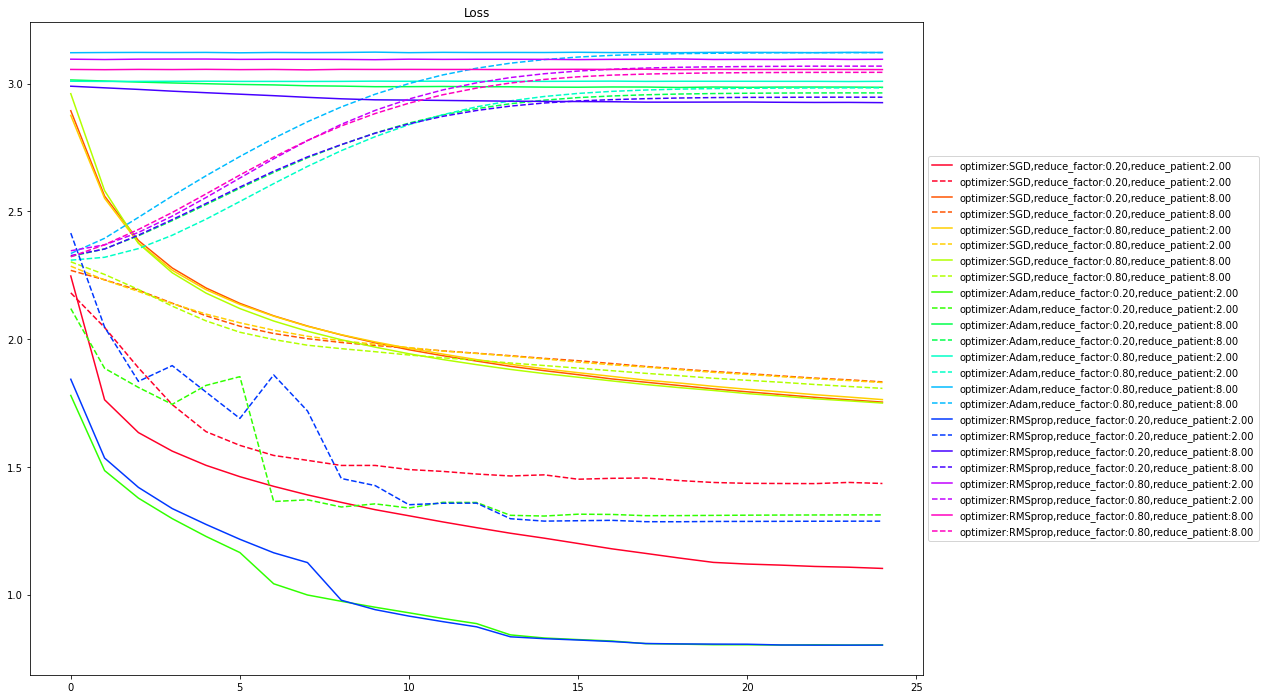

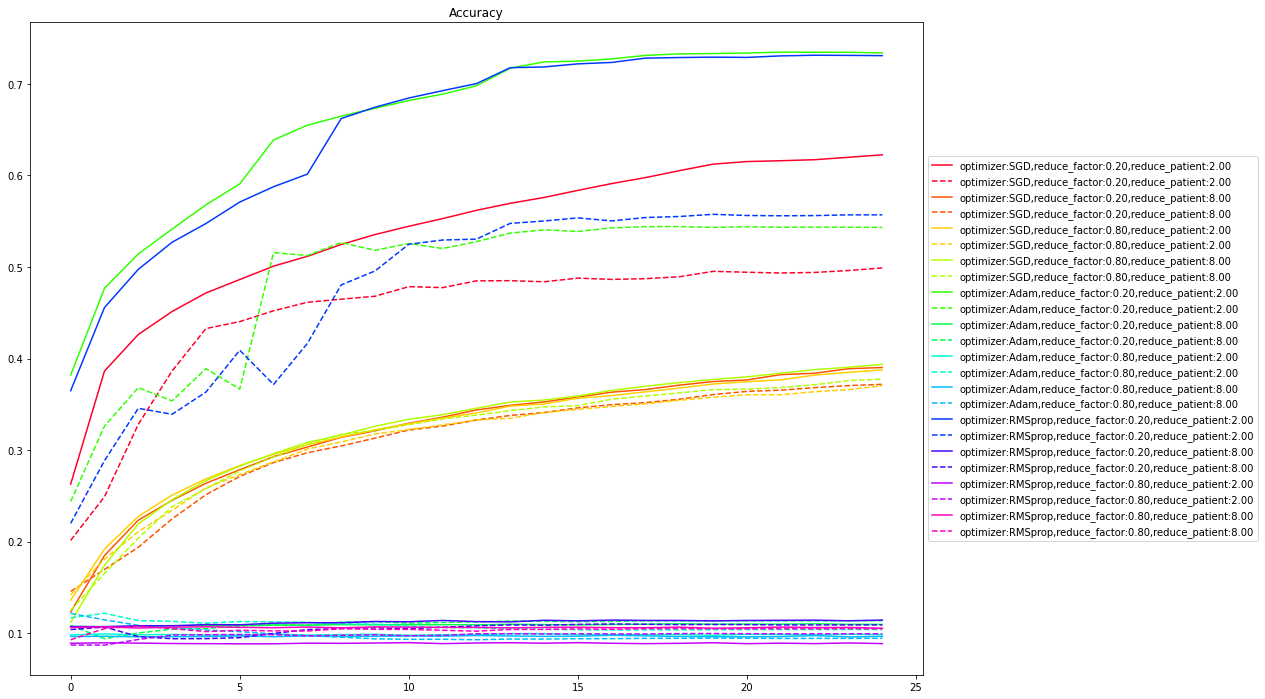

In [21]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()